En esta actividad, vamos a poner en práctica todo lo que aprendimos sobre procesamiento de imágenes para crear un proyecto.

Objetivo: El objetivo de este proyecto es que utilicen procedimientos básicos de procesamiento de imágenes para leer una imagen, aplicarle mejoras, segmentar objetos y mostrar los resultados en una presentación visual.

Duración: Tenemos 1 hora para completar este desafío.

##Preparación:

Entorno: Vamos a usar Google Colab, que ya tiene todo lo que necesitamos instalado.

##Imágenes:

Les voy a proporcionar un conjunto de imágenes de ejemplo para que elijan la que más les guste. Hay de todo un poco: paisajes, objetos, retratos... ¡para que tengan variedad!

Si prefieren, ¡pueden usar sus propias fotos! Solo recuerden elegir una imagen con buena iluminación y calidad para que los resultados sean los mejores.

Google Colab: Este cuaderno ya está listo para que trabajen. Solo tienen que seguir las instrucciones y completar el código en los espacios indicados.

Pasos a seguir:

##1. ¡Empecemos importando las bibliotecas!
Lo primero que vamos a hacer es importar las herramientas que vamos a utilizar.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 2. Leyendo y viendo nuestra imagen
Subir la imagen: Si van a usar una foto propia, súbanla a Google Colab. Para hacerlo, hagan clic en el ícono de la carpeta en la barra lateral izquierda, luego en el ícono de "Subir" y seleccionen su archivo.

Leer la imagen: Con cv2.imread(), vamos a leer la imagen que eligieron. Recuerden que OpenCV lee las imágenes en formato BGR, así que la vamos a convertir a RGB para poder verla bien con Matplotlib.

Mostrar la imagen original: Usaremos matplotlib.pyplot para ver la imagen tal como es al principio.

--2025-05-05 22:27:38--  https://img.freepik.com/fotos-premium/gran-grupo-frutas-verduras-frescas_135427-2732.jpg
Resolving img.freepik.com (img.freepik.com)... 184.26.127.33, 184.26.127.9, 2600:1417:76::6874:f311, ...
Connecting to img.freepik.com (img.freepik.com)|184.26.127.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67688 (66K) [image/jpeg]
Saving to: ‘gran-grupo-frutas-verduras-frescas_135427-2732.jpg’

gran-grupo-frutas-v 100%[===================>]  66.10K   112KB/s    in 0.6s    

2025-05-05 22:27:39 (112 KB/s) - ‘gran-grupo-frutas-verduras-frescas_135427-2732.jpg’ saved [67688/67688]



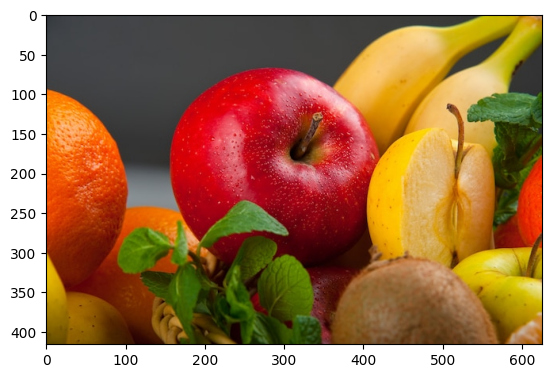

In [2]:
# Descarga y lectura de imagen
!wget https://img.freepik.com/fotos-premium/gran-grupo-frutas-verduras-frescas_135427-2732.jpg
img = cv2.imread('gran-grupo-frutas-verduras-frescas_135427-2732.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Ploteamos la imagen
plt.imshow(img)
plt.show()


##3. ¡Mejorando nuestra imagen!
Ahora vamos a aplicar un par de técnicas para que nuestra imagen se vea aún mejor:

Ajuste de brillo y contraste: Vamos a crear una función para modificar estos aspectos de la imagen.

Ecualización de histograma: Con cv2.equalizeHist(), vamos a mejorar el contraste de la imagen.

In [3]:
def imhist3(X):
    (N, M, P) = X.shape  # Obtener dimensiones de la imagen
    n = 256  # Número de niveles de colores
    for p in range(3):  # Para cada canal de color
        h = np.zeros((256,))  # Crear un histograma vacío
        for i in range(N):  # Recorrer cada fila
            for j in range(M):  # Recorrer cada columna
                x = X[i, j, p]  # Obtener el valor del píxel
                h[x] += 1  # Incrementar el conteo en el histograma
        plt.figure(figsize=(30, 9))  # Tamaño de la figura
        plt.bar(range(n), h[0:n])  # Mostrar el histograma
        plt.title('Histograma del Canal ' + str(p))  # Título
        plt.show()  # Mostrar figura

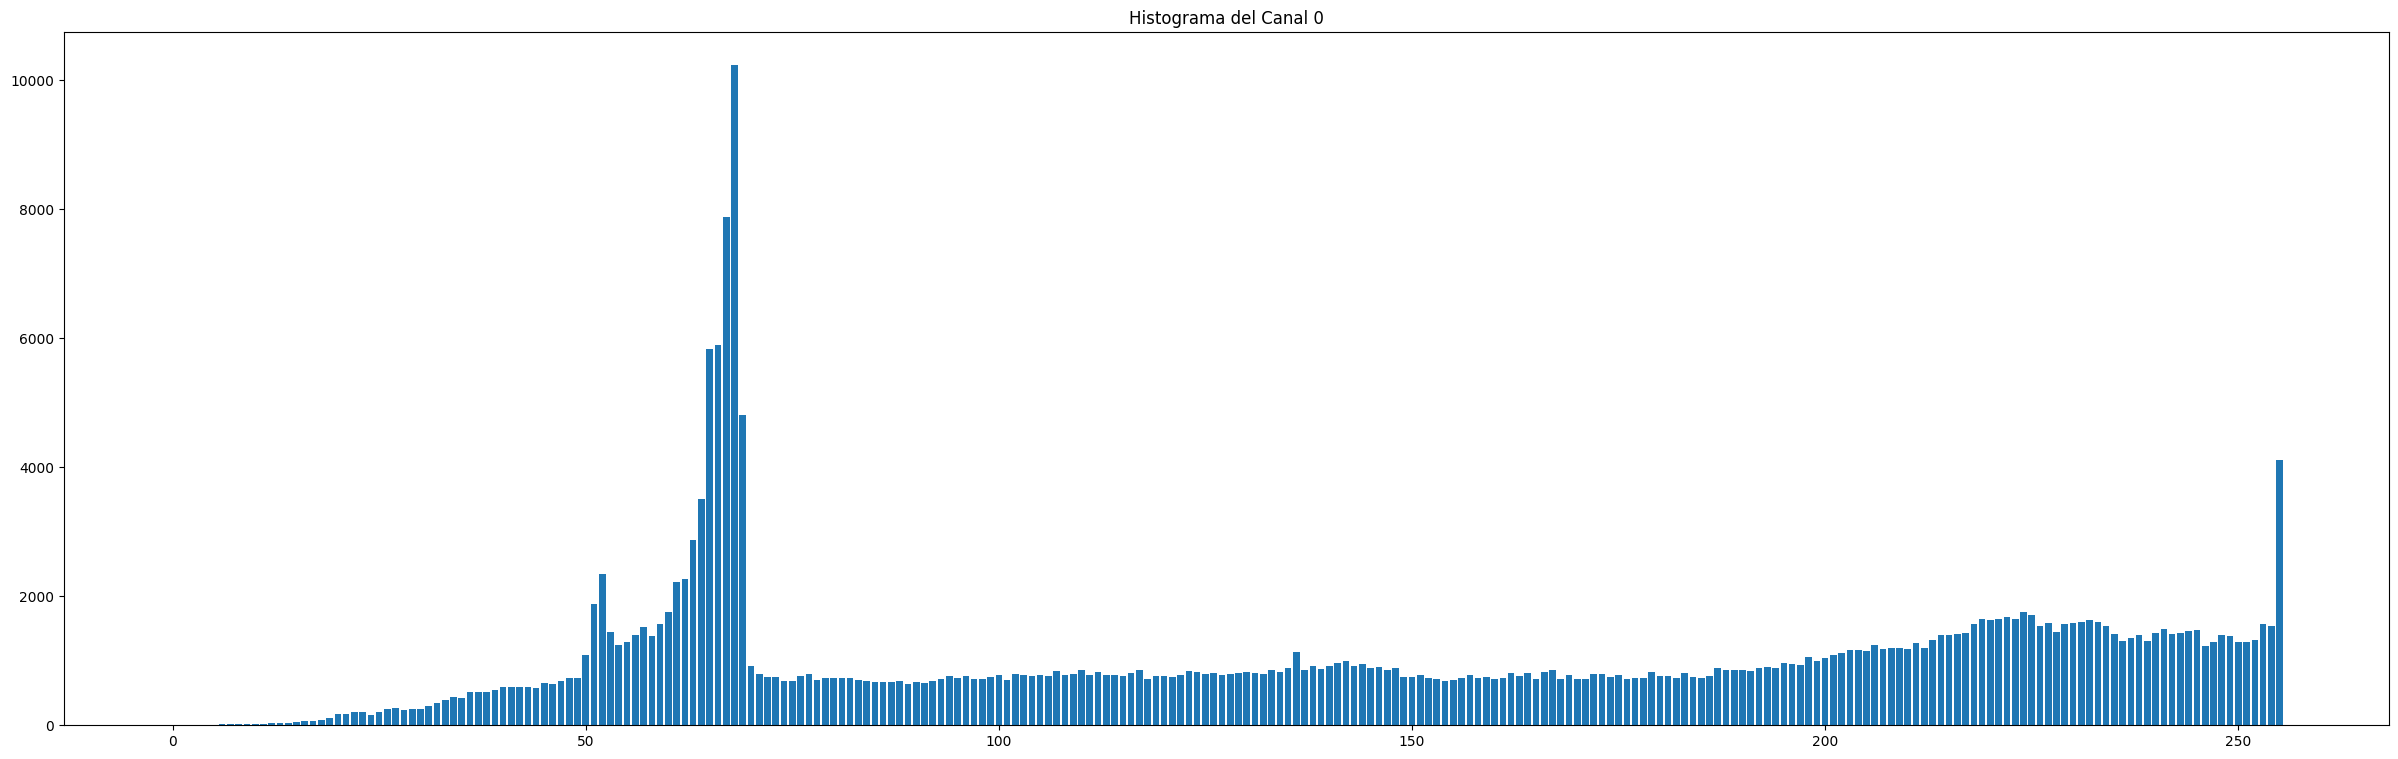

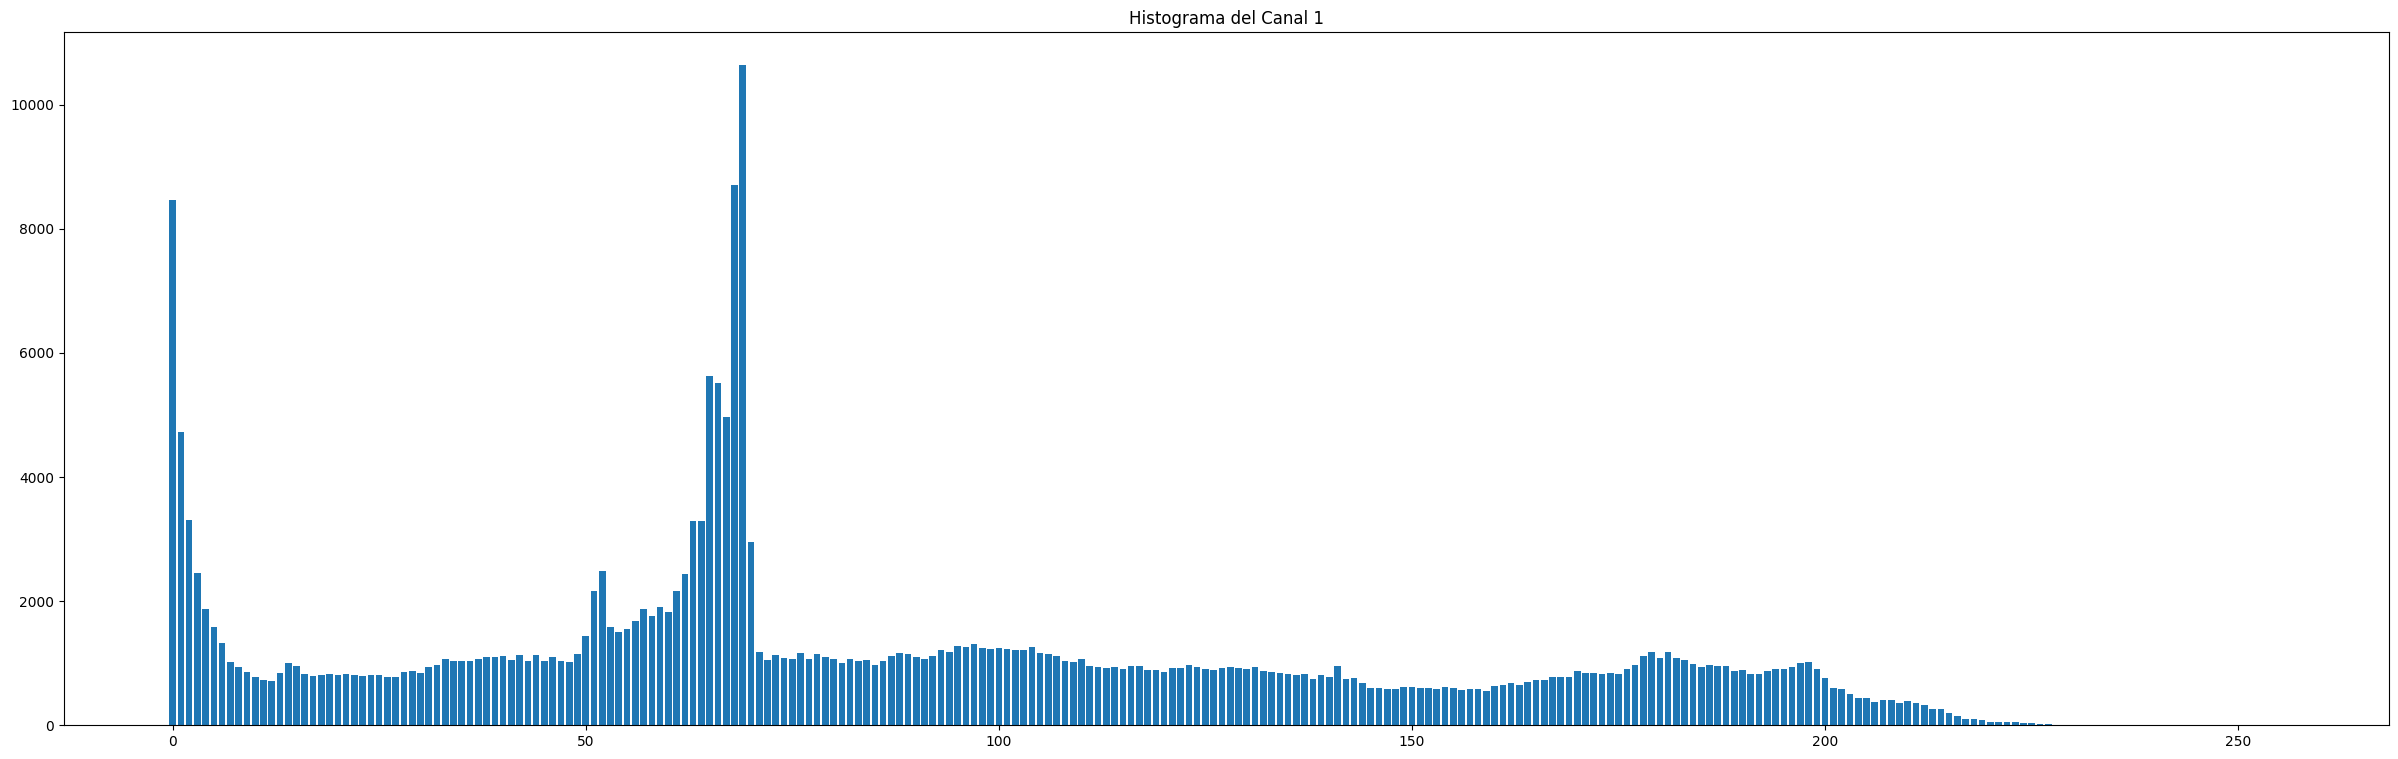

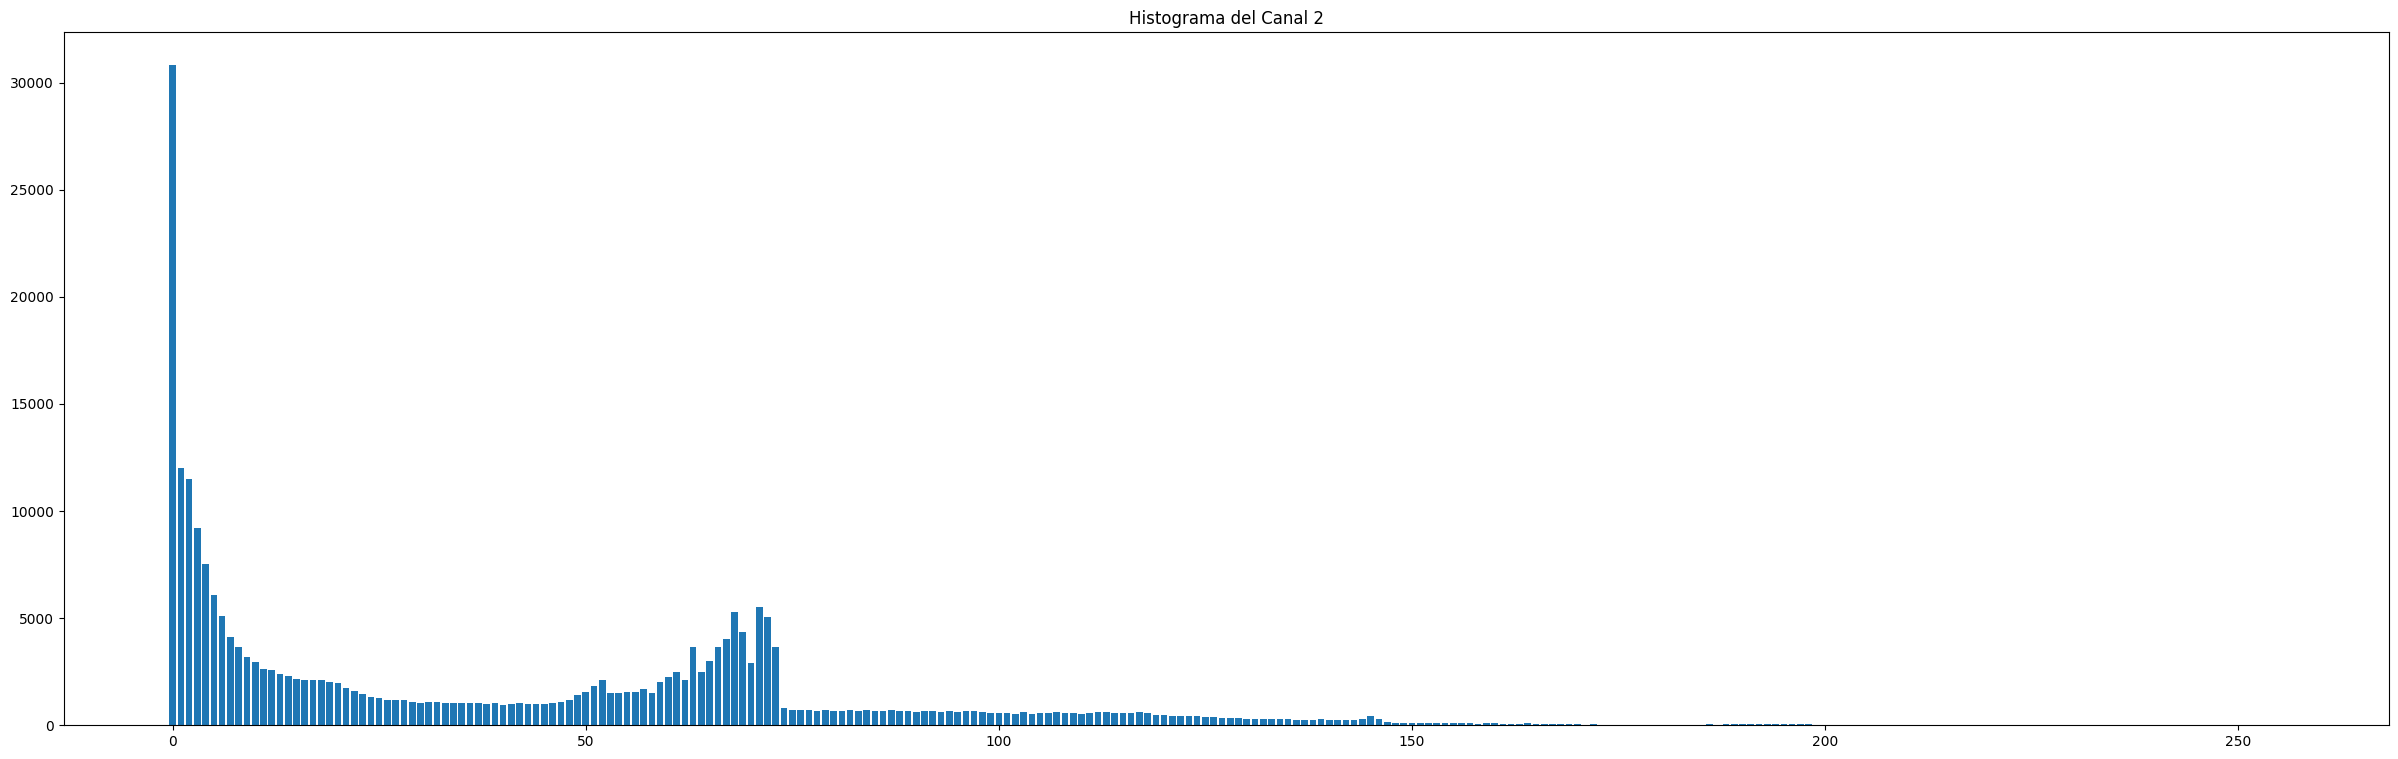

In [4]:
imhist3(img)  # Calcular y mostrar el histograma

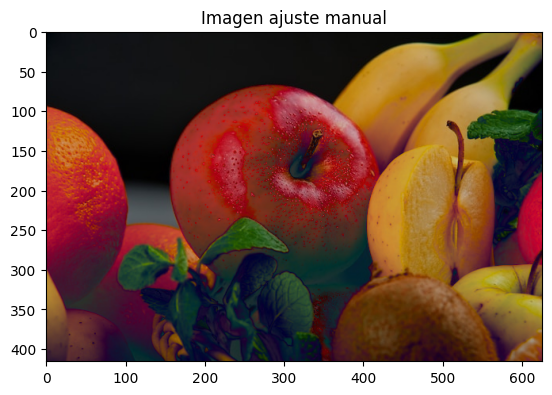

In [5]:
#Hago una copia de la imagen original para ajustar de forma manual
img_aju = img.copy()
img_aju_b = cv2.convertScaleAbs(img_aju, alpha=1, beta=-50)
plt.imshow(img_aju_b)
plt.title('Imagen ajuste manual')
plt.show()

In [7]:
# Hago una copia de la imagen original
img_b = img.copy()

# Convierto a HSV
img_hsv = cv2.cvtColor(img_b, cv2.COLOR_BGR2HSV)

#Utilizamos metodo para ecualizar canal de brillo (v)
img_hsv[:, :, 2] = cv2.equalizeHist(img_hsv[:, :, 2])

#Volvemos a convertir de nuevo a BGR
img_ecu_b = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

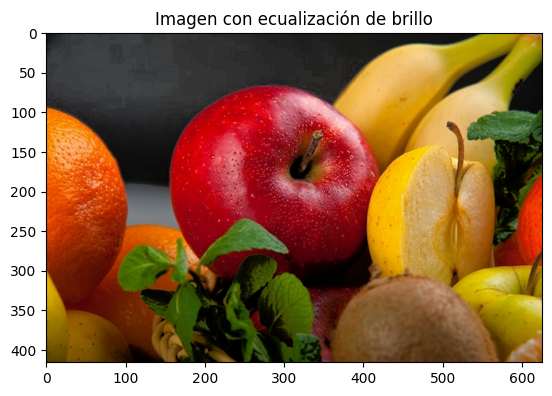

In [8]:
plt.imshow(img_ecu_b)
plt.title('Imagen con ecualización de brillo')
plt.show()

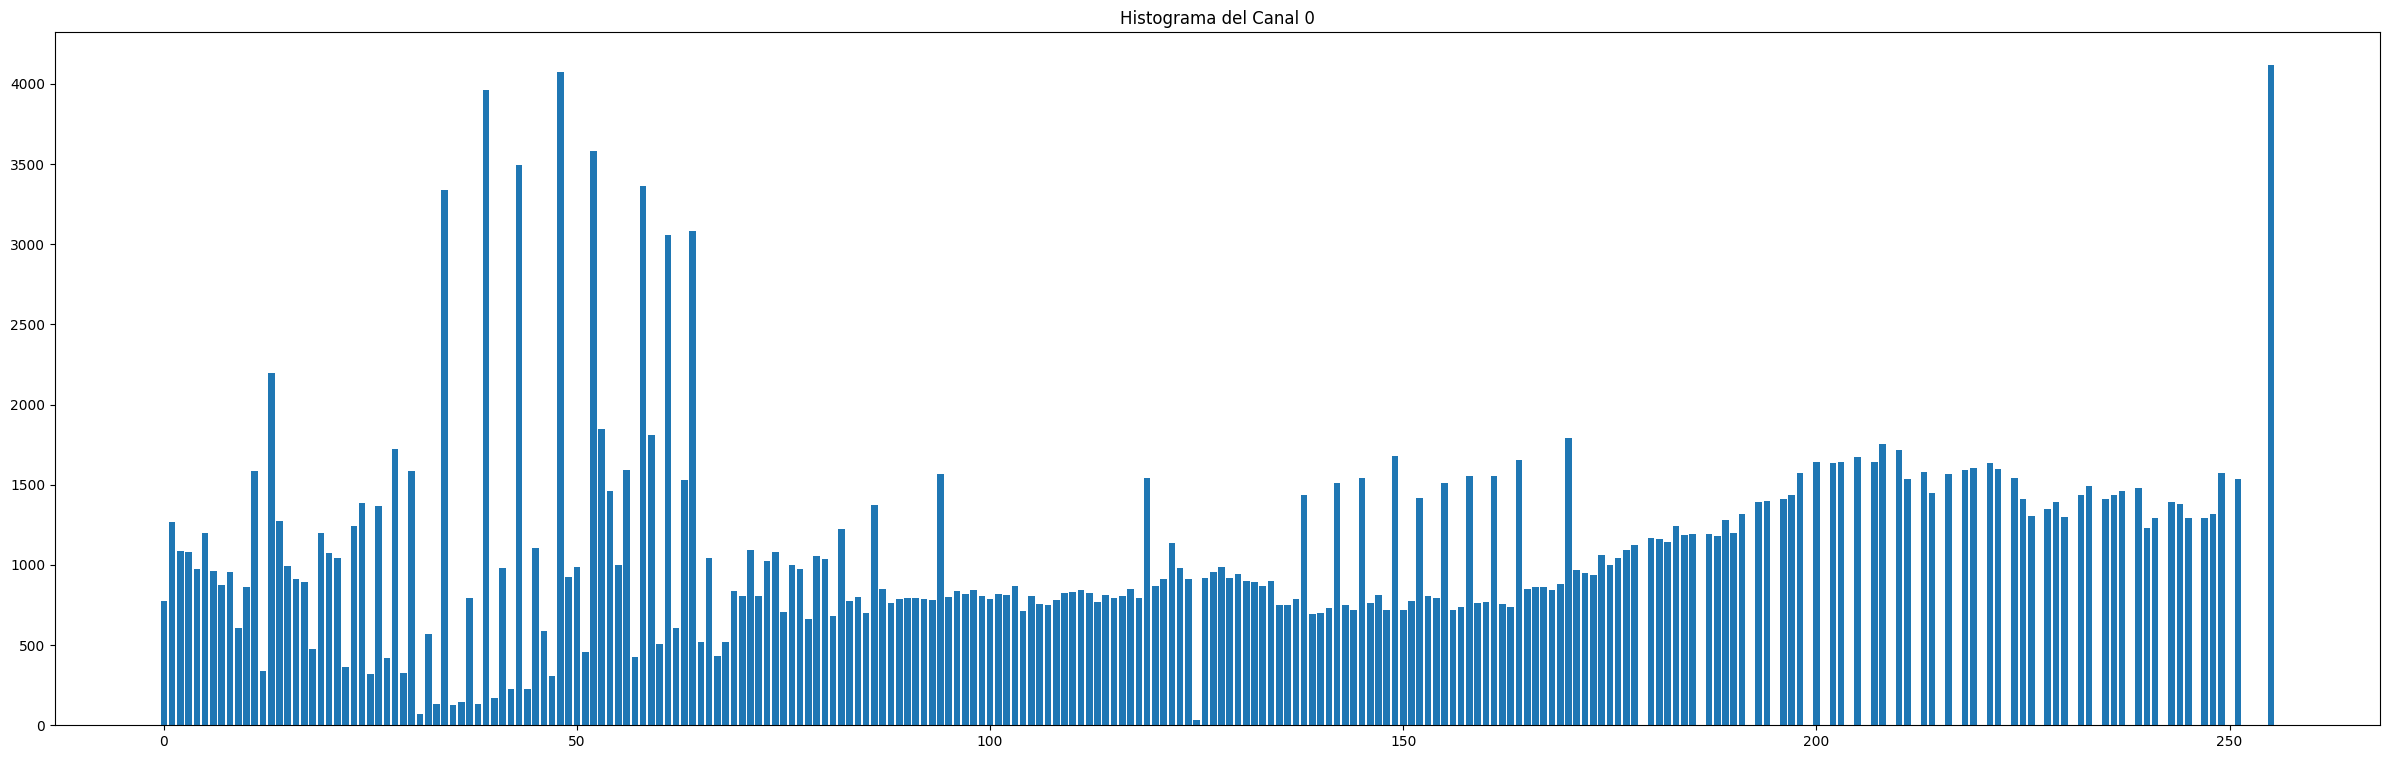

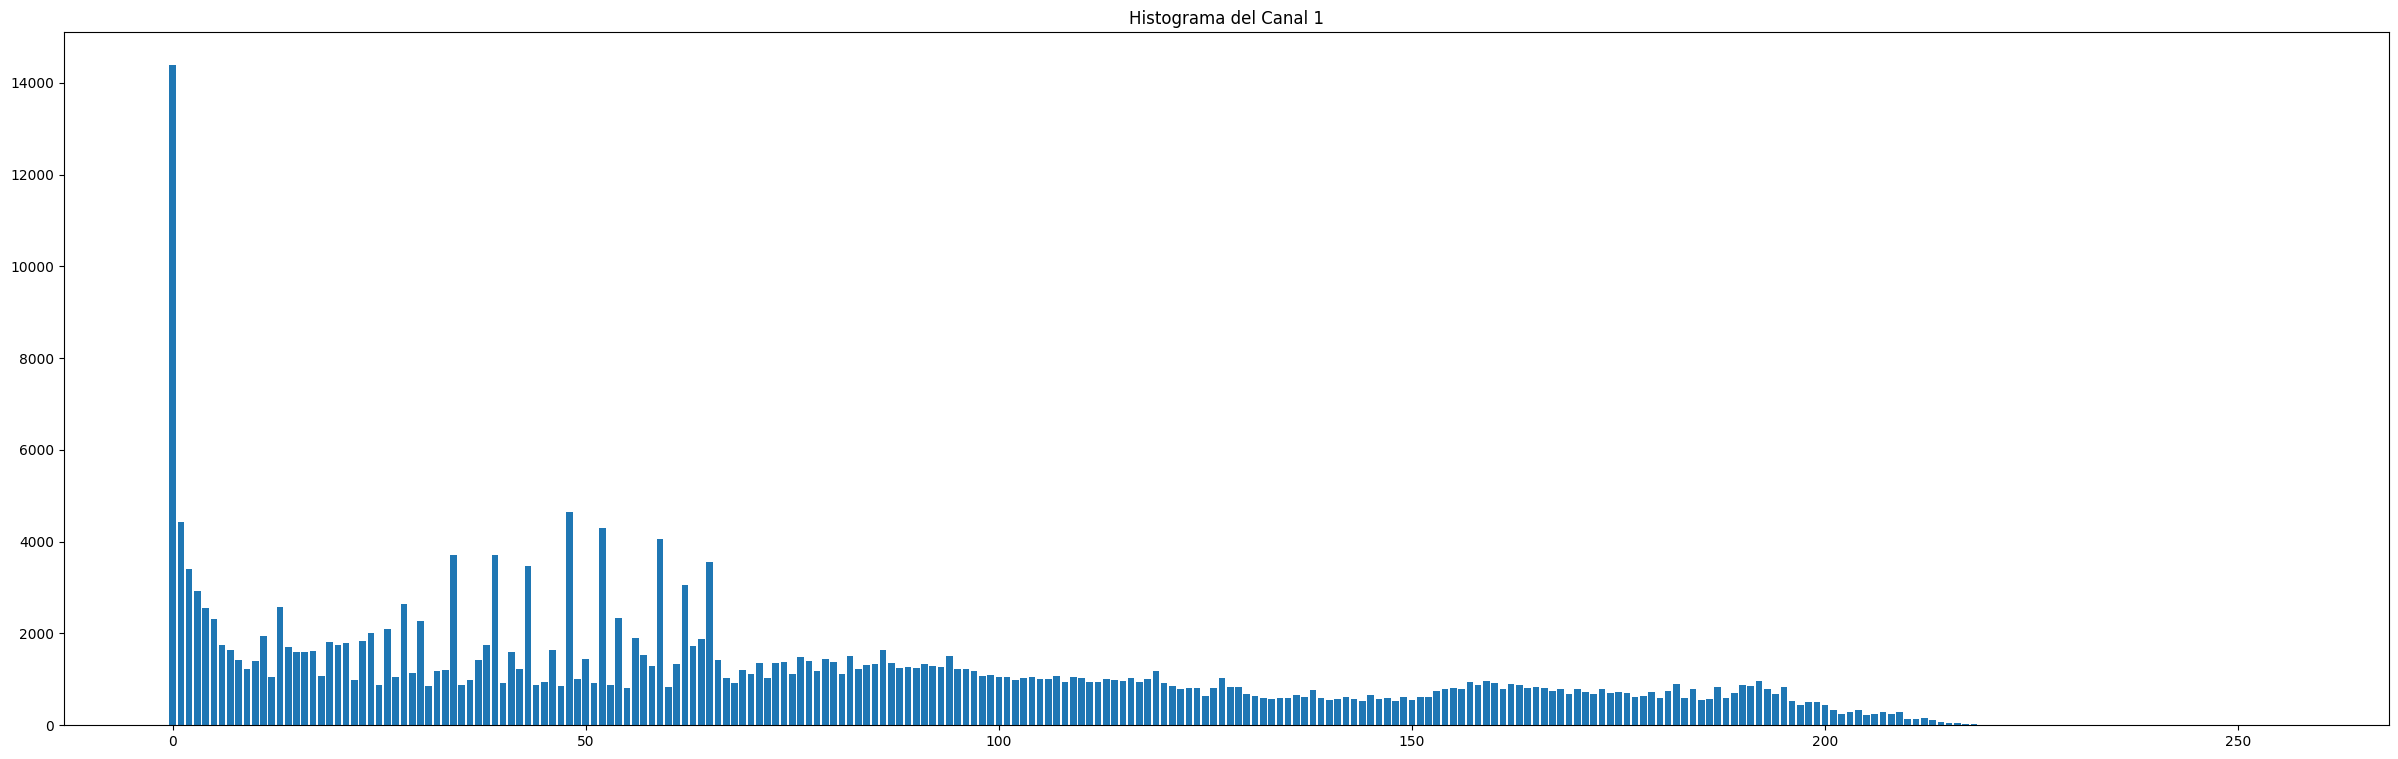

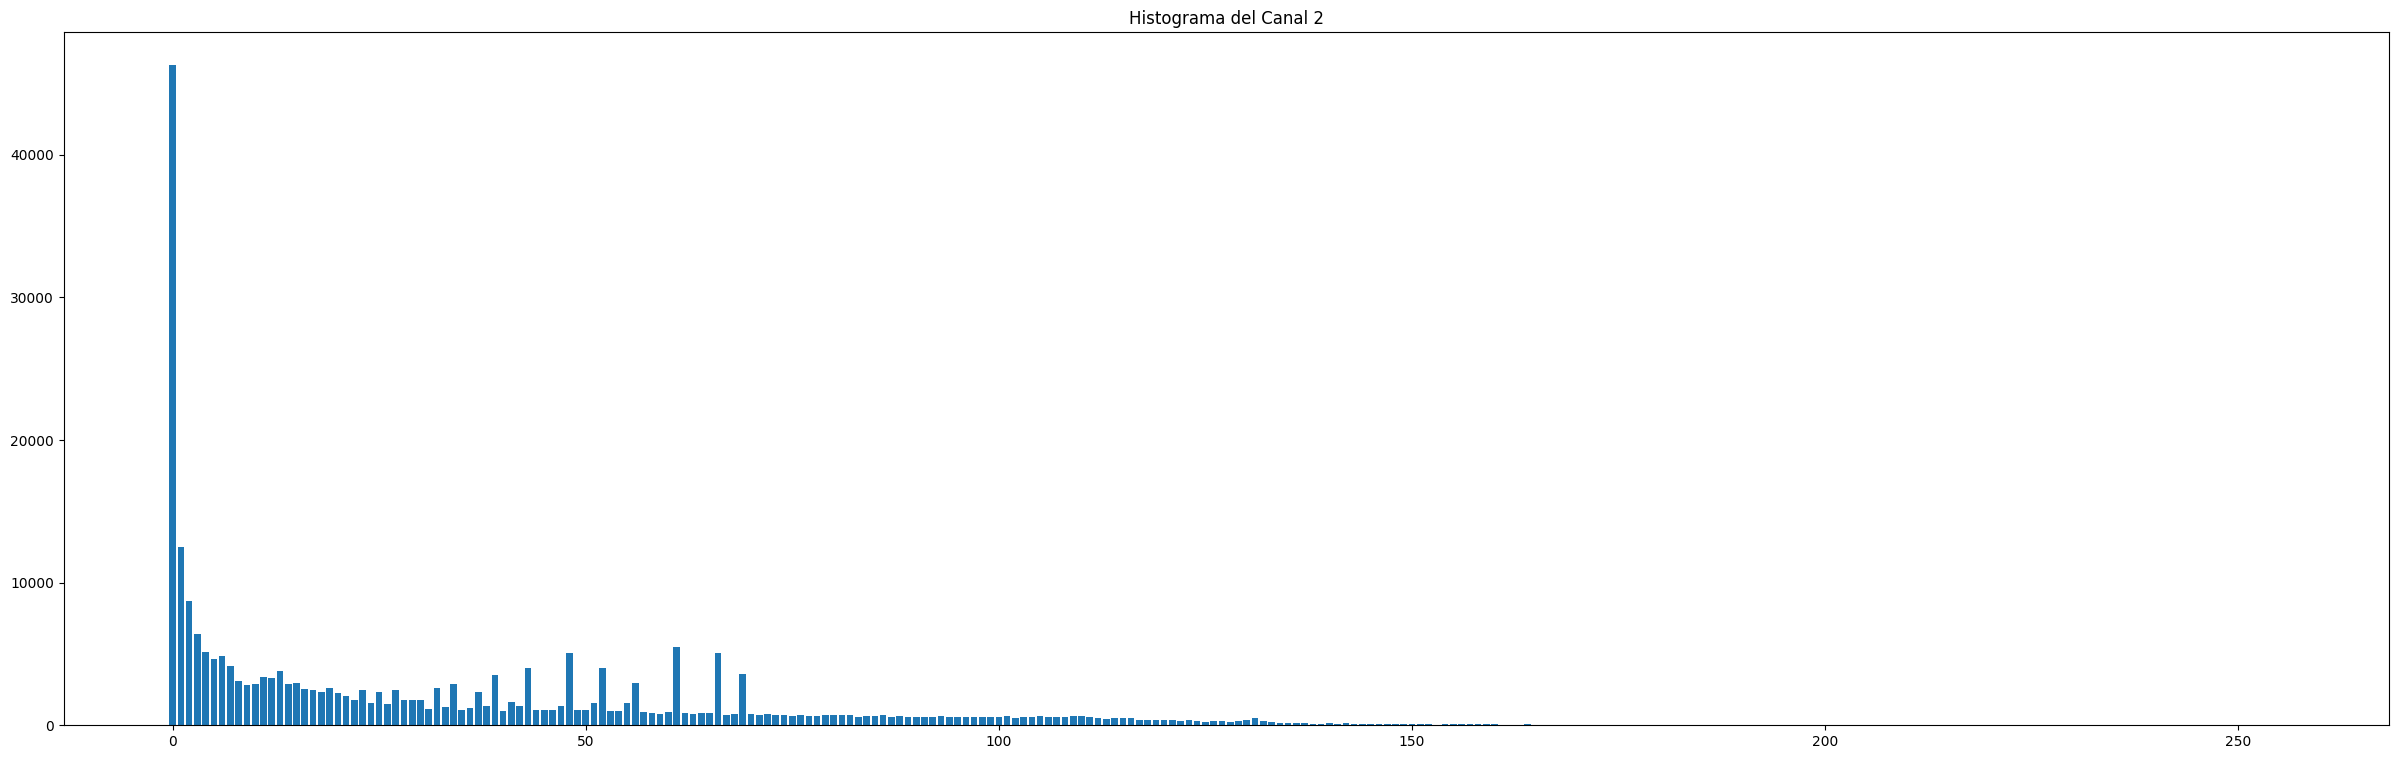

In [9]:
imhist3(img_ecu_b)  # Calcular y mostrar el histograma

##4. ¡A segmentar por color!
Ahora viene una parte muy interesante: vamos a separar objetos de la imagen por su color.

Convertir a HSV: Vamos a pasar la imagen de RGB a HSV (Hue, Saturation, Value) porque es más fácil definir rangos de color en HSV.

Definir el rango de color: Vamos a establecer los límites inferior y superior del color que queremos segmentar. En el ejemplo, segmentamos el color rojo de las flores. ¡Presten mucha atención acá! Van a tener que ajustar estos valores para su propia imagen.

Crear una máscara: Con cv2.inRange(), vamos a crear una máscara que nos indique qué píxeles están dentro del rango de color y cuáles no.

Aplicar la máscara: Usaremos cv2.bitwise_and() para quedarnos solo con la parte de la imagen que corresponde al color que elegimos.

In [10]:
# Segmentación por color:
#Intento aislar un objeto por su color (ejemplo: la manzana roja)

# Rango inferior del color rojo encontrado al azar en HSV
limite_inferior_rojo = np.array([117, 10, 130])
# Rango superior del color rojo encontrado al azar en HSV
limite_superior_rojo = np.array([130, 255, 255])
# Creamos una máscara para el color rojo
mascara_rojo = cv2.inRange(img_hsv, limite_inferior_rojo, limite_superior_rojo)
# Aplicamos la máscara a la imagen original
imagen_segmentada_rojo = cv2.bitwise_and(img, img , mask=mascara_rojo)

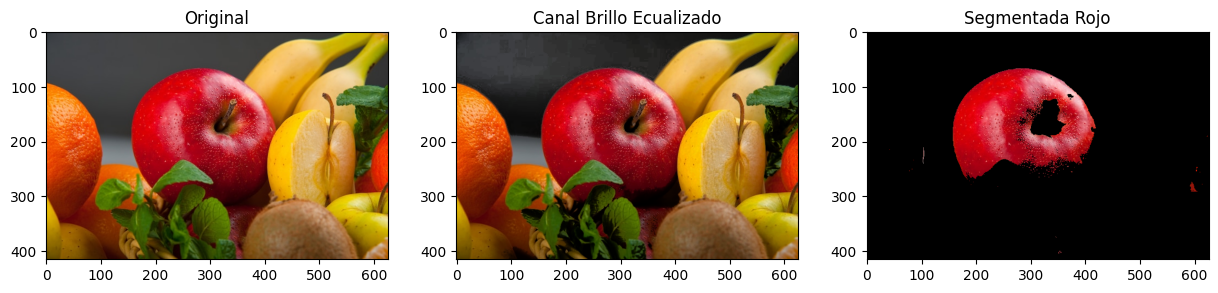

In [11]:
# Mostrar los resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(img_ecu_b)
plt.title('Canal Brillo Ecualizado')
plt.subplot(1, 3, 3)
plt.imshow(imagen_segmentada_rojo)
plt.title('Segmentada Rojo')
plt.show()

##5. ¡Dibujando y escribiendo sobre la imagen!
Para terminar, vamos a agregarle un poco de información a nuestra imagen segmentada.

Dibujar rectángulos: Con cv2.findContours() vamos a encontrar los contornos de los objetos que segmentamos, y con cv2.boundingRect() vamos a obtener las coordenadas para dibujar un rectángulo alrededor de ellos. Usaremos cv2.rectangle() para dibujar el rectángulo.

Agregar texto: Con cv2.putText(), vamos a agregar un texto que describa los objetos que segmentamos.

In [14]:
def dibujar_rectangulo(img, mascara_rojo):
    contornos, _ = cv2.findContours(mascara_rojo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    imagen_con_info = img.copy()

    if contornos:
        contorno_principal = max(contornos, key=cv2.contourArea) # selecciona los maximos contornos exteriores encontrados
        x, y, w, h = cv2.boundingRect(contorno_principal) #calcula las coordenadas del contorno. empieza en X,y y luego esta el ancho (w) y largo (h)
        cv2.rectangle(imagen_con_info, (x, y), (x + w, y + h), (0, 255, 0), 5)  #dibuja un rectangulo usando las coordenadas arriba calculadas
        cv2.putText(imagen_con_info, 'Manzana roja', (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), 2) #ingreso texto, el parametro del tamaño , del color blanco, etc
    return imagen_con_info

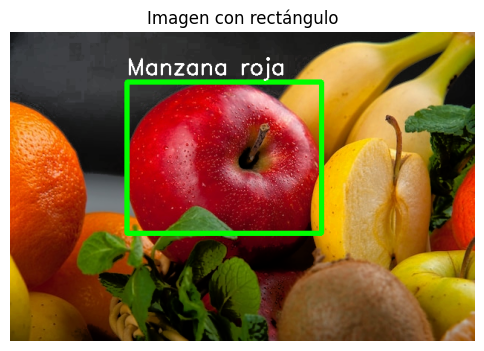

In [13]:
# Convierto la imagen segmentada a escala de grises y luego a binaria
resultado_rgb = cv2.cvtColor(imagen_segmentada_rojo, cv2.COLOR_BGR2RGB)  #convierto a RGB
resultado_gris = cv2.cvtColor(imagen_segmentada_rojo, cv2.COLOR_RGB2GRAY) # de RGB a gris
_, mascara_binaria = cv2.threshold(resultado_gris, 1, 255, cv2.THRESH_BINARY) #de gris a binaria (blanco y negro)

# Dibujar rectángulo
imagen_con_info = dibujar_rectangulo(img_ecu_b, mascara_binaria)

# Mostrar imagen original con rectángulo
plt.figure(figsize=(6, 6))
plt.imshow(imagen_con_info)
plt.title("Imagen con rectángulo")
plt.axis("off")
plt.show()

##6. Presentaciones preliminares

Cada uno/una de ustedes va a tener 5 minutos para mostrarnos su trabajo, que debe incluir:

La imagen original.

La imagen mejorada (ya sea con ajuste de brillo/contraste o ecualización de histograma).

La imagen segmentada.

Una explicación de todo el proceso, incluyendo:

La imagen que eligieron y por qué.

Los valores que usaron para ajustar el brillo y el contraste (si lo hicieron).

El rango de color HSV que eligieron para segmentar y por qué.

Cualquier dificultad que hayan tenido y cómo la resolvieron.

## Recursos

### Datasets Generales:

**[COCO](https://cocodataset.org/) (Common Objects in Context):** Este dataset es muy completo, con imágenes de objetos cotidianos en escenas complejas. Es ideal para practicar segmentación y reconocimiento de objetos.

**Ideas para el proyecto:** Segmentar diferentes objetos en una escena (personas, autos, animales) y analizar sus relaciones espaciales.


**[Open Images](https://storage.googleapis.com/openimages/web/index.html):** Un dataset masivo con millones de imágenes y anotaciones de objetos. Ofrece una gran variedad de temas y es excelente para proyectos más ambiciosos.

**Ideas para el proyecto:** Detectar y segmentar múltiples objetos en una imagen, o incluso intentar segmentar objetos dentro de un contexto específico (por ejemplo, segmentar diferentes tipos de árboles en un paisaje).


**[ImageNet](https://www.image-net.org/):** Este dataset contiene una gran cantidad de imágenes organizadas según la jerarquía de WordNet.

**Ideas para el Proyecto:** Los estudiantes pueden usar un subconjunto de ImageNet para segmentar y clasificar diferentes categorías de imágenes, como animales, vehículos o plantas.


### Datasets Específicos:

**[Flores](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html):** Datasets como Oxford Flowers 102 son perfectos para proyectos de segmentación por color, donde los estudiantes pueden aislar flores de diferentes tipos y colores.

**Ideas para el proyecto:** Segmentar flores de un color específico y luego usar técnicas de procesamiento de imágenes para analizar su forma o textura.


**[Rostros](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html):** Datasets como CelebA pueden usarse para proyectos de segmentación de características faciales o reconocimiento de rostros.

**Ideas para el proyecto:** Segmentar diferentes partes del rostro (ojos, nariz, boca) y analizar cómo cambian con las expresiones faciales.


**[Paisajes Urbanos](https://www.cityscapes-dataset.com/):** Cityscapes es ideal para segmentar elementos en entornos urbanos, como autos, peatones y edificios.

### Dónde Encontrar Más Datasets:

**[Kaggle](https://www.kaggle.com/datasets?search=image):** Esta plataforma ofrece una gran variedad de datasets de imágenes subidos por la comunidad, que pueden ser útiles para proyectos específicos.


**[Papers With Code](https://paperswithcode.com/datasets?mod=images):** Este sitio web recopila datasets utilizados en investigaciones de aprendizaje automático, incluyendo muchos datasets de imágenes.
Usa el código con precaución